In [1]:
import pyaerocom as pya
import os
pya.change_verbosity('critical')

/home/jonasg/anaconda3/lib/python3.6/site-packages/geonum/__init__.py:32: UserWarning: Neither LatLon23 nor LatLon are available. Many basic features will not be available (e.g. objects GeoPoint or GeoVector 
  warn('Neither LatLon23 nor LatLon are available. Many basic features '
/home/jonasg/anaconda3/lib/python3.6/site-packages/geonum/__init__.py:42: UserWarning: Plotting of maps etc. is deactivated, please install Basemap
  warn('Plotting of maps etc. is deactivated, please install Basemap')
/home/jonasg/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## Comparison of multiple variables based on model suite and observations

This notebook is based on netCDF files that contain data that has been colocated. The colocated data files can be created using the [ANALYSIS_SCRIPT.py](https://github.com/metno/pyaerocom-synthesis/blob/master/ANALYSIS_SCRIPT.py) file which is part of this repository. 

An overview of the available parameters, models and the corresponding obsnetworks used for the intercomparison study is provided below. 

### Setup paths and notebook options

#### Directory for colocated data files

In [2]:
DATA_DIR = pya.const.OUTPUTDIR + 'colocated_data'
# check if read is ok
if not os.access(DATA_DIR, os.R_OK):
    raise IOError('Cannot access data')
DATA_DIR

'/lustre/storeA/project/aerocom/aerocom2/pyaerocom_out/colocated_data'

### Model list

In [3]:
models = os.listdir(DATA_DIR)
models

['INCA-BCext_CTRL2016-PD',
 'GEOS5-freegcm_CTRL2016-PD',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD',
 'INCA-BCin_CTRL2016-PD',
 'SPRINTARS-T213_AP3-CTRL2016-PD',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD',
 'ECHAM6-SALSA_CTRL2016-PD',
 'CNRM-AESM2_AP3-CTRL2016-PD',
 'ECHAM6-HAM2_AP3-CTRL2016-PD',
 'SPRINTARS-T106_AP3-CTRL2016-PD',
 'HadGEM3-GA7.1_AP3-CTRL2016-PD',
 'CNRM-AESM2Nud_AP3-CTRL2016-PD',
 'INCA_CTRL2016-PD',
 'GEOS5-assimilate_CTRL2016-PD',
 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD',
 'CAM5.3-Oslo_AP3-CTRL2016-PD']

#### Comment on colocated data files

The directory containing colocated data files (*DATA_DIR*) contains sub-directories for each model available. The colocated data files are named using the following convention:

*<var_name>_REF-<obsnetwork_id>_MOD-<model_id>_<ts_type_source>_<start_date>_<stop_date>_<ts_type>_<filter_name>_COLL.nc*

For instance:

*abs550aer_REF-AeronetInvV3Lev2.daily_MOD-INCA-BCext_CTRL2016-PD-3hourly_20100101_20101231_monthly_WORLD-noMOUNTAINS_COLL.nc*

#### Output directory

In [4]:
OUTPUT_DIR = 'output_notebooks/'

WRITE_OK = True
if not os.access(OUTPUT_DIR, os.W_OK):
    print('No write access to output directory, no files will be saved')
    WRITE_OK = False

#### Output files

In [5]:
RESULT_TABLE_ALL = OUTPUT_DIR + 'multi_comp_table_all.csv'
RESULT_TABLE_SELECTION = OUTPUT_DIR + 'multi_comp_table_selection.csv'

#### Options

In [6]:
# If False and RESULT_TABLE_ALL exists, then the results are simply read from the table CSV file and not reloaded from the
# colocated data .nc files (faster)
RELOAD_RESULTS_ALL = True

# If False and R
RELOAD_RESULTS_SELECTION = False 

# It True, all heatmaps created below are saved as png in the above specified output directory
SAVE_HEATMAPS = True

# Read and plot heatmap from all available (may require some time to compute statistics for all files)
MAKE_HEATMAP_ALL = True

### Import all NetCDF files containing colocated data

First, check if results table exists and if not make sure results are reloaded. Then read results using reading class *ReadColocatedData*.

In [7]:
from helpers.io import ReadColocatedData
reader = ReadColocatedData(DATA_DIR)

#### EDIT model / year combinations

##### Available model / year combinations

All combinations that are available as co-located data files.

In [8]:
reader.model_year_combinations

[['INCA-BCext_CTRL2016-PD', 2010],
 ['INCA-BCext_CTRL2016-PD', 2008],
 ['GEOS5-freegcm_CTRL2016-PD', 2010],
 ['GEOS-Chem-v11-01_AP3-CTRL2016-PD', 2008],
 ['GEOS-Chem-v11-01_AP3-CTRL2016-PD', 2010],
 ['ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 2008],
 ['ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 2010],
 ['INCA-BCin_CTRL2016-PD', 2010],
 ['INCA-BCin_CTRL2016-PD', 2008],
 ['SPRINTARS-T213_AP3-CTRL2016-PD', 2010],
 ['SPRINTARS-T213_AP3-CTRL2016-PD', 2008],
 ['ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 2010],
 ['ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 2008],
 ['ECHAM6-SALSA_CTRL2016-PD', 2008],
 ['ECHAM6-SALSA_CTRL2016-PD', 2010],
 ['CNRM-AESM2_AP3-CTRL2016-PD', 2010],
 ['ECHAM6-HAM2_AP3-CTRL2016-PD', 2010],
 ['SPRINTARS-T106_AP3-CTRL2016-PD', 2010],
 ['HadGEM3-GA7.1_AP3-CTRL2016-PD', 2010],
 ['HadGEM3-GA7.1_AP3-CTRL2016-PD', 2008],
 ['CNRM-AESM2Nud_AP3-CTRL2016-PD', 2010],
 ['INCA_CTRL2016-PD', 2010],
 ['GEOS5-assimilate_CTRL2016-PD', 2010],
 ['ECHAM6.3-HAM2

##### Selection of model / year combinations (THIS WILL SHOW UP IN HEATMAPS)

In [9]:
MODEL_YEAR_SELECTION = [
    ['INCA-BCext_CTRL2016-PD', 2010],
    ['INCA-BCin_CTRL2016-PD', 2010],
    ['ECHAM6.3-HAM2.3_AP3-CTRL2016-PD', 2010],
    ['CAM5.3-Oslo_AP3-CTRL2016-PD', 2010]]

##### Preview x-labels for heatmap plots

The following cell creates a dictionary (key, value pairs) of available model-year combinations as they would show up in the heatmaps below. These can be edited in the following cell.

In [10]:
xlabels = {}
for combo in reader.model_year_combinations:
    label = '{}-{}'.format(combo[0], combo[1])
    xlabels[label] = label
xlabels

{'INCA-BCext_CTRL2016-PD-2010': 'INCA-BCext_CTRL2016-PD-2010',
 'INCA-BCext_CTRL2016-PD-2008': 'INCA-BCext_CTRL2016-PD-2008',
 'GEOS5-freegcm_CTRL2016-PD-2010': 'GEOS5-freegcm_CTRL2016-PD-2010',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2008': 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2008',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2010': 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2010',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2008': 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2008',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2010': 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2010',
 'INCA-BCin_CTRL2016-PD-2010': 'INCA-BCin_CTRL2016-PD-2010',
 'INCA-BCin_CTRL2016-PD-2008': 'INCA-BCin_CTRL2016-PD-2008',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2010': 'SPRINTARS-T213_AP3-CTRL2016-PD-2010',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2008': 'SPRINTARS-T213_AP3-CTRL2016-PD-2008',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2010': 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2010',
 'ECMWF-IFS-CY43R1-CAMS-

#### Edit x-labels (if desired)

Copy the dictionary (output previous cell) and edit the entries that you want to change (after : in each row).

In [11]:
PLOT_XLABELS = {
'INCA-BCext_CTRL2016-PD-2010': 'INCA-BCext 2010',
 'INCA-BCext_CTRL2016-PD-2008': 'INCA-BCext 2008',
 'GEOS5-freegcm_CTRL2016-PD-2010': 'GEOS5-freegcm 2010',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2008': 'GEOS-Chem-v11 2008',
 'GEOS-Chem-v11-01_AP3-CTRL2016-PD-2010': 'GEOS-Chem-v11 2010',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2008': 'ECMWF-IFS 2008',
 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD-2010': 'ECMWF-IFS 2010',
 'INCA-BCin_CTRL2016-PD-2010': 'INCA-BCin 2010',
 'INCA-BCin_CTRL2016-PD-2008': 'INCA-BCin 2008',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2010': 'SPRINTARS-T213 2010',
 'SPRINTARS-T213_AP3-CTRL2016-PD-2008': 'SPRINTARS-T213 2008',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2010': 'ECMWF-IFS (NITRATE) 2010',
 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD-2008': 'ECMWF-IFS (NITRATE) 2008',
 'ECHAM6-SALSA_CTRL2016-PD-2008': 'ECHAM6-SALSA 2008',
 'ECHAM6-SALSA_CTRL2016-PD-2010': 'ECHAM6-SALSA 2010',
 'CNRM-AESM2_AP3-CTRL2016-PD-2010': 'CNRM-AESM2 2010',
 'ECHAM6-HAM2_AP3-CTRL2016-PD-2010': 'ECHAM6-HAM2 2010',
 'SPRINTARS-T106_AP3-CTRL2016-PD-2010': 'SPRINTARS-T106 2010',
 'HadGEM3-GA7.1_AP3-CTRL2016-PD-2010': 'HadGEM3-GA7.1 2010',
 'HadGEM3-GA7.1_AP3-CTRL2016-PD-2008': 'HadGEM3-GA7.1 2008',
 'CNRM-AESM2Nud_AP3-CTRL2016-PD-2010': 'CNRM-AESM2Nud 2010',
 'INCA_CTRL2016-PD-2010': 'INCA 2010',
 'GEOS5-assimilate_CTRL2016-PD-2010': 'GEOS5-assim 2010',
 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD-2008': 'ECHAM6.3-HAM2.3 2008',
 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD-2010': 'ECHAM6.3-HAM2.3 2010',
 'CAM5.3-Oslo_AP3-CTRL2016-PD-2010': 'CAM5.3-Oslo 2010'
}

#### EDIT variable / obs combinations

##### Available variable / obs combinations (to pick from if desired)

In [12]:
reader.var_obs_combinations

[['od550aer', 'AeronetSunV3Lev2.daily'],
 ['od550aer', 'MODIS6.aqua'],
 ['od550aer', 'MISRV31'],
 ['abs550aer', 'AeronetInvV3Lev2.daily'],
 ['od550aer', 'MODIS6.terra'],
 ['od550dust', 'AATSRSUv4.3'],
 ['ang4487aer', 'AATSRSUv4.3'],
 ['ang4487aer', 'AeronetSunV3Lev2.daily'],
 ['od550gt1aer', 'AATSRSUv4.3'],
 ['od550lt1aer', 'AATSRSUv4.3'],
 ['ang4487aer', 'MISRV31'],
 ['od550lt1aer', 'AeronetSDAV3Lev2.daily'],
 ['od550gt1aer', 'AeronetSDAV3Lev2.daily'],
 ['od550aer', 'AATSRSUv4.3'],
 ['abs550aer', 'AATSRSUv4.3'],
 ['ec550aer', 'EBASMC']]

##### Selection of variable /obs combinations (THIS WILL SHOW UP IN HEATMAPS)

In [13]:
VAR_OBS_SELECTION = [
     ['od550aer', 'AeronetSunV3Lev2.daily'],
     ['od550aer', 'MISRV31'],
     ['abs550aer', 'AeronetInvV3Lev2.daily'],
     ['od550aer', 'MODIS6.terra'],
     ['abs550aer', 'AATSRSUv4.3'],
     ['ec550aer', 'EBASMC']
]

##### Preview y-labels for heatmap plots

In [14]:
ylabels = {}
for combo in reader.var_obs_combinations:
    label = '{}-{}'.format(combo[0], combo[1])
    ylabels[label] = label
ylabels

{'od550aer-AeronetSunV3Lev2.daily': 'od550aer-AeronetSunV3Lev2.daily',
 'od550aer-MODIS6.aqua': 'od550aer-MODIS6.aqua',
 'od550aer-MISRV31': 'od550aer-MISRV31',
 'abs550aer-AeronetInvV3Lev2.daily': 'abs550aer-AeronetInvV3Lev2.daily',
 'od550aer-MODIS6.terra': 'od550aer-MODIS6.terra',
 'od550dust-AATSRSUv4.3': 'od550dust-AATSRSUv4.3',
 'ang4487aer-AATSRSUv4.3': 'ang4487aer-AATSRSUv4.3',
 'ang4487aer-AeronetSunV3Lev2.daily': 'ang4487aer-AeronetSunV3Lev2.daily',
 'od550gt1aer-AATSRSUv4.3': 'od550gt1aer-AATSRSUv4.3',
 'od550lt1aer-AATSRSUv4.3': 'od550lt1aer-AATSRSUv4.3',
 'ang4487aer-MISRV31': 'ang4487aer-MISRV31',
 'od550lt1aer-AeronetSDAV3Lev2.daily': 'od550lt1aer-AeronetSDAV3Lev2.daily',
 'od550gt1aer-AeronetSDAV3Lev2.daily': 'od550gt1aer-AeronetSDAV3Lev2.daily',
 'od550aer-AATSRSUv4.3': 'od550aer-AATSRSUv4.3',
 'abs550aer-AATSRSUv4.3': 'abs550aer-AATSRSUv4.3',
 'ec550aer-EBASMC': 'ec550aer-EBASMC'}

#### Edit y-labels (if desired)

Copy the dictionary (output previous cell) and edit the entries that you want to change (after : in each row).

In [15]:
PLOT_YLABELS = {
 'od550aer-AeronetSunV3Lev2.daily': 'AOD (550nm) AERONET',
 'od550aer-MODIS6.aqua': 'AOD (550nm) MODIS aqua',
 'od550aer-MISRV31': 'AOD (550nm) MISR',
 'abs550aer-AeronetInvV3Lev2.daily': 'AAOD (550nm) AERONET',
 'od550aer-MODIS6.terra': 'AOD (550nm) MODIS terra',
 'od550dust-AATSRSUv4.3': 'Dust AOD (550nm) AATSR',
 'ang4487aer-AATSRSUv4.3': 'ang4487aer-AATSRSUv4.3',
 'ang4487aer-AeronetSunV3Lev2.daily': 'Ang. Exp. (440-870nm) AERONET',
 'od550gt1aer-AATSRSUv4.3': 'Coarse AOD (550nm) AATSR',
 'od550lt1aer-AATSRSUv4.3': 'Fine AOD (550nm) AATSR',
 'ang4487aer-MISRV31': 'Ang. Exp. (440-870nm) MISR',
 'od550lt1aer-AeronetSDAV3Lev2.daily': 'Fine AOD (550nm) AERONET',
 'od550gt1aer-AeronetSDAV3Lev2.daily': 'Coarse AOD (550nm) AERONET',
 'od550aer-AATSRSUv4.3': 'AOD (550nm) AATSR',
 'abs550aer-AATSRSUv4.3': 'AAOD (550nm) AATSR',
 'ec550aer-EBASMC': 'Scat. coeff. (550nm) EBAS' #Michael: here, extinction from model was analysed against scattering coeff EBAS
}

## Analysis of selected model / year and var / obs combinations

Import the results. This writes a csv table of the statistical results and whenever this notebook is re-executed, this csv table is reloaded, in case ``RELOAD_RESULTS_SELECTION`` is True (because it is faster). 

**THUS NOTE:** if you change your selection above, set ``RELOAD_RESULTS_SELECTION=False`` (in Section **Options** above), when you run this notebook for the first time with the new selection, so that the csv file is recreated.

In [16]:
if RELOAD_RESULTS_SELECTION or not os.path.exists(RESULT_TABLE_SELECTION):
    # searches for obs_id, var_name, model_id (OVM) combinations so that for each of these, exatly one row exist. 
    table = reader.compute_statistics_table(var_obs_combinations=VAR_OBS_SELECTION,
                                            model_year_combinations=MODEL_YEAR_SELECTION) 
    table.to_csv(RESULT_TABLE_SELECTION)
else:
    table = reader.read_statistics_table_csv(RESULT_TABLE_SELECTION)    

/home/jonasg/github/pyaerocom-synthesis/helpers/io.py:216: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  parse_dates=False)


#### Display the table with the statistics results

In [17]:
table

ts_type  \
model_id                        year var_name  obs_id                            
CAM5.3-Oslo_AP3-CTRL2016-PD     2010 abs550aer AATSRSUv4.3              yearly   
                                               AATSRSUv4.3             monthly   
                                               AeronetInvV3Lev2.daily  monthly   
                                               AeronetInvV3Lev2.daily   yearly   
                                     ec550aer  EBASMC                   yearly   
                                               EBASMC                  monthly   
                                     od550aer  AeronetSunV3Lev2.daily  monthly   
                                               AeronetSunV3Lev2.daily   yearly   
                                               MODIS6.terra            monthly   
                                               MODIS6.terra             yearly   
ECHAM6.3-HAM2.3_AP3-CTRL2016-PD 2010 abs550aer AATSRSUv4.3             monthly   
                                               AATSRSUv4.3              yearly   
                                               AeronetInvV3Lev2.daily  monthly   
                                               AeronetInvV3Lev2.daily    daily   
                                               AeronetInvV3Lev2.daily   yearly   
                                     od550aer  AeronetSunV3Lev2.daily    daily   
                                               AeronetSunV3Lev2.daily   yearly   
                                               AeronetSunV3Lev2.daily  monthly   
                                               MODIS6.terra            monthly   
                                               MODIS6.terra             yearly   
INCA-BCext_CTRL2016-PD          2010 abs550aer AATSRSUv4.3              yearly   
                                               AATSRSUv4.3             monthly   
                                               AeronetInvV3Lev2.daily   yearly   
                                               AeronetInvV3Lev2.daily    daily   
                                               AeronetInvV3Lev2.daily  monthly   
                                     od550aer  AeronetSunV3Lev2.daily  monthly   
                                               AeronetSunV3Lev2.daily    daily   
                                               AeronetSunV3Lev2.daily   yearly   
                                               AeronetSunV3Lev2.daily   yearly   
                                               AeronetSunV3Lev2.daily  monthly   
                                               MODIS6.terra             yearly   
                                               MODIS6.terra            monthly   
                                               MODIS6.terra            monthly   
                                               MODIS6.terra             yearly   
INCA-BCin_CTRL2016-PD           2010 abs550aer AATSRSUv4.3              yearly   
                                               AATSRSUv4.3             monthly   
                                               AeronetInvV3Lev2.daily  monthly   
                                               AeronetInvV3Lev2.daily    daily   
                                               AeronetInvV3Lev2.daily   yearly   
                                     od550aer  AeronetSunV3Lev2.daily  monthly   
                                               AeronetSunV3Lev2.daily    daily   
                                               AeronetSunV3Lev2.daily   yearly   
                                               MODIS6.terra            monthly   
                                               MODIS6.terra             yearly   

                                                                      ts_type_src  \
model_id                        year var_name  obs_id                               
CAM5.3-Oslo_AP3-CTRL2016-PD     2010 abs550aer AATSRSUv4.3                monthly   
                                           

In [18]:
# remove outliers
import numpy as np
table['nmb'][table['nmb'] > 1000] = np.nan

/home/jonasg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
def update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, fontsize=16, xrotation=45, yrotation=45):
    xlbls = ax.get_xticklabels() #get the default x-labels
    xlbls_new = []
    for lbl in xlbls: #iterate over all xlabels
        lbl = lbl.get_text() 
        if lbl in PLOT_XLABELS: #replace, if defined above
            xlbls_new.append(PLOT_XLABELS[lbl]) 
        else: # use original label and print warning
            print('Label {} not defined above, check PLOT_XLABELS'.format(lbl))
            xlbls_new.append(lbl)
    ylbls = ax.get_yticklabels() #get the default x-labels
    ylbls_new = []
    for lbl in ylbls: #iterate over all xlabels
        lbl = lbl.get_text() 
        if lbl in PLOT_YLABELS: #replace, if defined above
            ylbls_new.append(PLOT_YLABELS[lbl]) 
        else: # use original label and print warning
            print('Label {} not defined above, check PLOT_XLABELS'.format(lbl))
            ylbls_new.append(lbl)
    
    ax.set_xticklabels(xlbls_new, rotation=xrotation, fontsize=fontsize, ha='right')       
    ax.set_yticklabels(ylbls_new, rotation=yrotation, fontsize=fontsize, va='top')  
    return ax

In [20]:
def change_fontsize_colorbar(ax, fontsize=16):
    axes=ax.figure.axes[-1]
    yticks = axes.get_yticklabels()
    axes.set_yticklabels(yticks, fontsize=fontsize)
    lbl = axes.get_ylabel()
    axes.set_ylabel(lbl, fontsize=fontsize)
    return ax

#### Heatmaps of normalised mean bias (nmb) and Pearson correlation coefficient (R)

In [ ]:
from helpers.io import plot_heatmap
ax = plot_heatmap(table, colname='nmb', ts_type='monthly', color_rowwise=False, cbar=True,
                  figsize=(20, 12), center=0, vmin=-100, vmax=100, table_name='Normalised Bias [%]')
        
# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=18, #fontsize
                   xrotation=45, 
                   yrotation=45)
ax = change_fontsize_colorbar(ax, 24) # change fontsize colorbar
ax.set_ylabel('Var / Obs', fontsize=24)
ax.set_xlabel('Model / Year', fontsize=24)
ax.set_title('Normalised Bias [%]', fontsize=30)

# save figure
savename = 'heatmap_nmb_selection_monthly.png'
ax.figure(os.path.join(OUTPUT_DIR, savename))

Text(0.5,1,'Normalised Bias [%]')

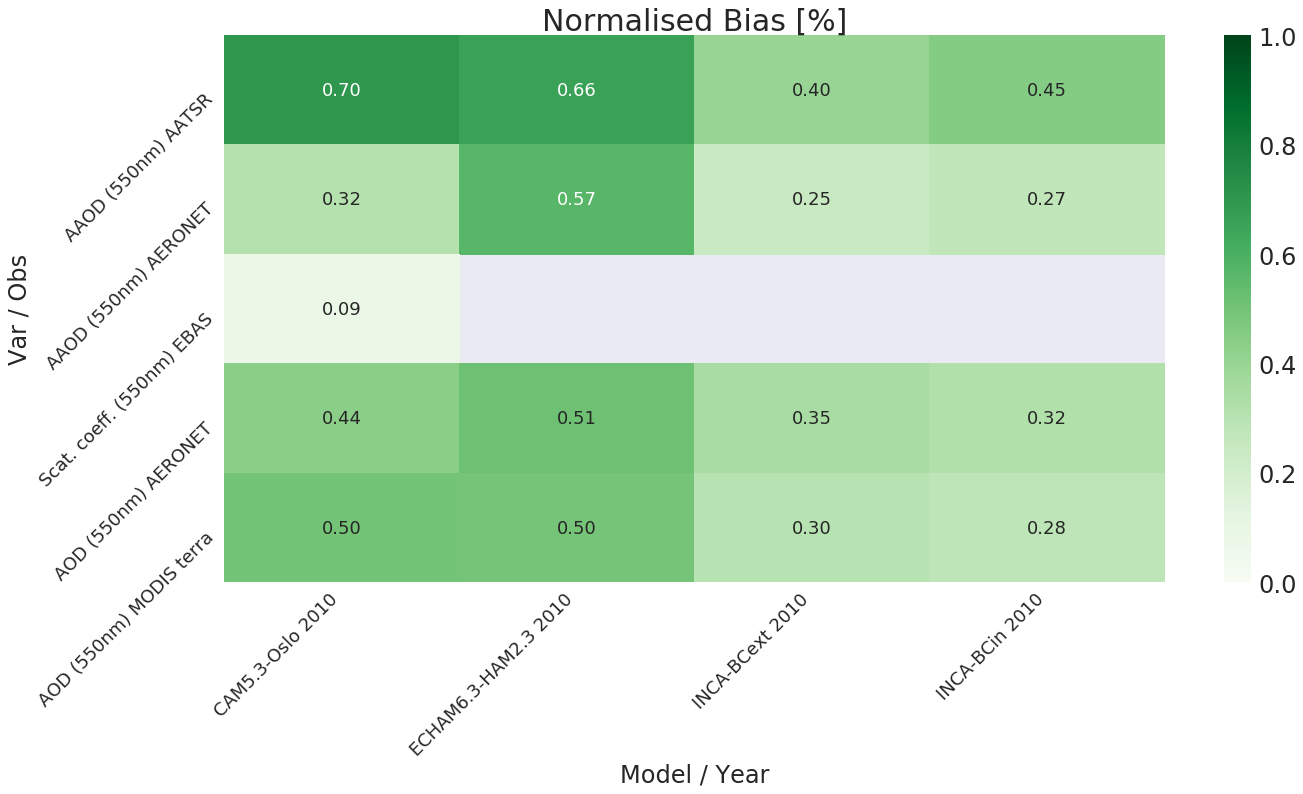

In [22]:
ax= plot_heatmap(table, colname='R', ts_type='monthly', cmap='Greens', vmin=0, vmax=1, num_digits=2, 
                 color_rowwise=False, table_name='R (Pearson)', figsize=(20, 12), cbar=True)

# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=18, #fontsize
                   xrotation=45, 
                   yrotation=45)
ax = change_fontsize_colorbar(ax, 24) # change fontsize colorbar
ax.set_ylabel('Var / Obs', fontsize=24)
ax.set_xlabel('Model / Year', fontsize=24)
ax.set_title('Correlation coefficient', fontsize=30)

# save figure
savename = 'heatmap_R_selection_monthly.png'
ax.figure(os.path.join(OUTPUT_DIR, savename))

### Analysis of results (ALL DATA)

In [ ]:
if MAKE_HEATMAP_ALL:
    if RELOAD_RESULTS_ALL or not os.path.exists(RESULT_TABLE_ALL):
        # searches for obs_id, var_name, model_id (OVM) combinations so that for each of these, exatly one row exist. 
        table = reader.compute_statistics_table() 
        table.to_csv(RESULT_TABLE_ALL)
    else:
        table = reader.read_statistics_table_csv(RESULT_TABLE_ALL)    

/home/jonasg/github/pyaerocom/pyaerocom/mathutils.py:87: RuntimeWarning: divide by zero encountered in true_divide
  tmp = difference / (data + ref_data)
/home/jonasg/github/pyaerocom/pyaerocom/mathutils.py:87: RuntimeWarning: invalid value encountered in true_divide
  tmp = difference / (data + ref_data)


**NOTE**: if **Option** ``MAKE_HEATMAP_ALL`` is ``False`` then, ``table`` corresponds to the table of the selection above and thus, the heatmaps below are the same as the ones above.

In [ ]:
table

In [ ]:
# remove outliers
import numpy as np
table['nmb'][table['nmb'] > 1000] = np.nan

#### Heatmaps of normalised mean bias (nmb) and Pearson correlation coefficient (R)

Text(0.5,1,'Normalised Bias [%]')

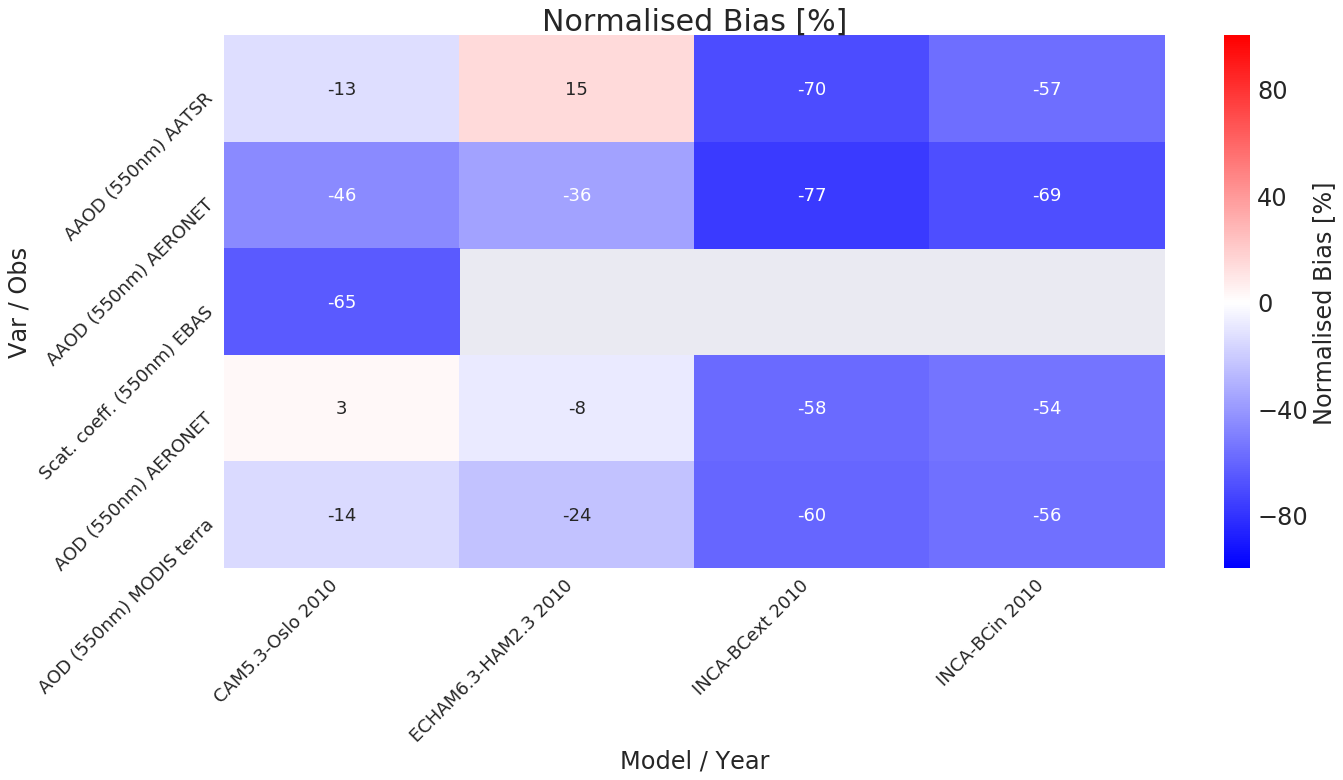

In [21]:
from helpers.io import plot_heatmap
ax = plot_heatmap(table, colname='nmb', ts_type='monthly', color_rowwise=False, cbar=True,
                  figsize=(20, 12), center=0, vmin=-100, vmax=100, table_name='Normalised Bias [%]')
        
# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=18, #fontsize
                   xrotation=45, 
                   yrotation=45)
ax = change_fontsize_colorbar(ax, 24) # change fontsize colorbar
ax.set_ylabel('Var / Obs', fontsize=24)
ax.set_xlabel('Model / Year', fontsize=24)
ax.set_title('Normalised Bias [%]', fontsize=30)

# save figure
savename = 'heatmap_nmb_all_monthly.png'
ax.figure(os.path.join(OUTPUT_DIR, savename))

Text(0.5,1,'Normalised Bias [%]')

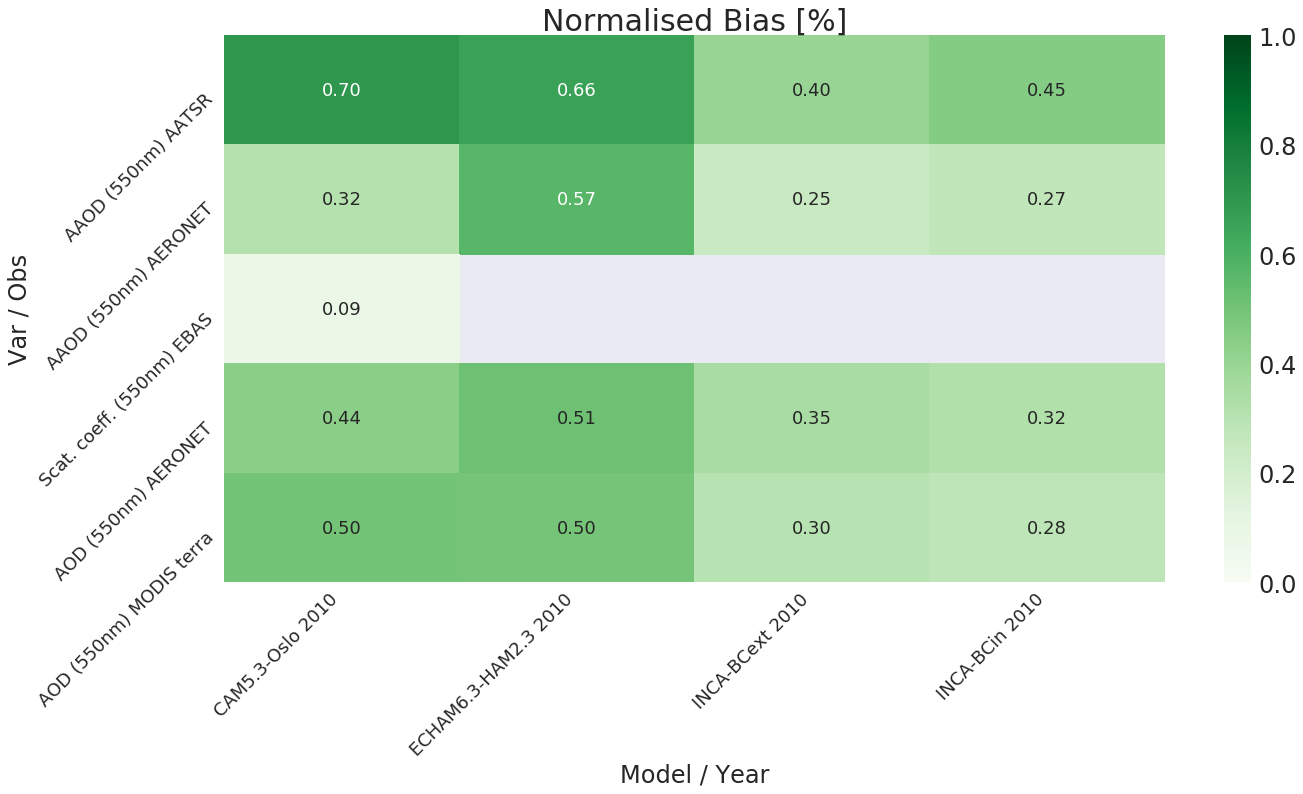

In [22]:
ax= plot_heatmap(table, colname='R', ts_type='monthly', cmap='Greens', vmin=0, vmax=1, num_digits=2, 
                 color_rowwise=False, table_name='R (Pearson)'
                 figsize=(20, 12), cbar=True)

# here you can edit the labelling, etc. should be self-explanatory
ax = update_labels(ax, PLOT_XLABELS, PLOT_YLABELS, #update x and y-labels according to settings above
                   fontsize=18, #fontsize
                   xrotation=45, 
                   yrotation=45)
ax = change_fontsize_colorbar(ax, 24) # change fontsize colorbar
ax.set_ylabel('Var / Obs', fontsize=24)
ax.set_xlabel('Model / Year', fontsize=24)
ax.set_title('Correlation coefficient', fontsize=30)

# save figure
savename = 'heatmap_R_all_monthly.png'
ax.figure(os.path.join(OUTPUT_DIR, savename))